# Import and read the dataset

Import Necessary library’s and Modules

In [ ]:
# utilities
import re  #used for regular expression operations, which are a powerful way to perform string manipulation tasks
import pickle # useful for saving and loading objects in a Python script
import numpy as np  # used for numerical operations
import pandas as pd  # used for data manipulation and analysis and provides data structures and functions needed to work with structured data

# plotting
import seaborn as sns  # is a data visualization library based on matplotlib, and provides a high-level interface for creating attractive
from wordcloud import WordCloud  # Python library for generating word clouds, which are visual representations of the frequency of words in a text
import matplotlib.pyplot as plt  # data visualization library that provides functionality for creating static, animated, and interactive visualizations in Python

# nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# sklearn   are machine learning models from the scikit-learn library that can be used for text classification
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split  #function from the scikit-learn library for splitting data into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer  # tool from the scikit-learn library for converting text into a numerical representation, known as a document-term matrix, which can then be used as input to a machine learning model
from sklearn.metrics import confusion_matrix, classification_report  #for evaluating the performance of a machine learning model
# classification_report function provides a summary of the model's performance across different metrics
# confusion_matrix function provides a way to visualize the performance of a binary classification model

[nltk_data] Downloading package wordnet to /root/nltk_data...


Read the dataset

In [ ]:
# Importing the dataset
DATASET_COLUMNS  = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/training.1600000.processed.noemoticon copy.csv' , encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

dataset.sample(5)

In [ ]:
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


# Plotting the distribution for dataset.

Plotting the distribution for dataset based on target.

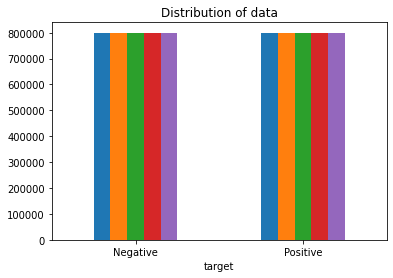

In [ ]:
# groups the data in the "dataset" dataframe by the values in the "target" column and counts the number of occurrences of each value
# then plots this count data as a bar chart using the plot method from the pandas library
# kind='bar' specifies that the plot type is a bar chart
ax = dataset.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists
# creates two lists: "text" and "sentiment", "text" list is populated with the values in the "text" column of the "dataset" dataframe
#"sentiment" list is populated with the values in the "target" column
text, sentiment = list(dataset['text']), list(dataset['target'])

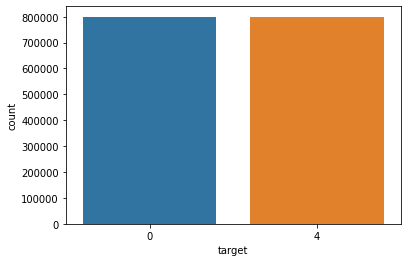

In [ ]:
# uses the library "seaborn" to plot a countplot of the "target" column in the "dataset" dataframe
import seaborn as sns
#  produce a bar chart showing the number of occurrences of each value in the "target" column
sns.countplot(x='target', data=dataset)

# Data Preprocessing

Before training the model, we conducted numerous pre-processing procedures on the dataset, mostly eliminating stopwords and emojis. For greater generality, the written material is subsequently transformed to lowercase.
Following that, the punctuations were cleaned and eliminated, removing superfluous noise from the dataset. Following that, we deleted the repetitive letters from the words, as well as the URLs, as they are of little significance.

Selecting the text and Target column for our further analysis and replacing the values for better understanding. (Assigning 1 to Positive sentiment 4)

In [ ]:
#extracting two columns, "text" and "target", from the "dataset" dataframe and creating a new dataframe called "data" to store these columns
data=dataset[['text','target']]

#  modify the values in the "target" column of the "data" dataframe by replacing all occurrences of 4 with 1
data['target'] = data['target'].replace(4,1)

<ipython-input-71-9031af915ed3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


Print unique values of target variables
0:negative
1:positive

In [ ]:
#  get an array of unique values in the "target" column of the "data" dataframe, which can be used to identify the number of distinct values in the column and their values
data['target'].unique()

array([0, 1])

Separating positive and negative tweets ,making the data easier to manage and combining them

In [ ]:
#  create two new dataframes "data_positive" and "data_negative" from the "data" dataframe based on the values in the "target" column
data_positive = data[data['target'] == 1]
data_negative = data[data['target'] == 0]

#  limit the size of the "data_positive" and "data_negative" dataframes to 20,000 rows each, so that they can be used for analysis or modeling with a more manageable amount of data
data_positive = data_positive.iloc[:int(20000)]
data_negative = data_negative.iloc[:int(20000)]

# combining the data from two separate DataFrames into one single DataFrame for further processing or analysis
dataset = pd.concat([data_positive, data_negative])

making the tweets more generalised and more effective to be classified  

In [ ]:
# converting the text in the 'text' column of the DataFrame to lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail() # returns the last 5 rows of the 'text' column in the DataFrame

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Defining set containing all stopwords in English to remove it from tweets text to make it clean

In [ ]:
# These are words that are commonly used in the English language
# and removed from text data before processing as they do not carry significant meaning and can sometimes introduce noise in text analysis
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own',
             're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
#  returns a string where each word is separated by a space and the words that are in the STOPWORDS set are removed
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text)) # now contains the text without the stopwords
dataset['text'].head() # first 5 texts from the 'text' column after removing the stopwords

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

Cleaning and removing punctuations, repeating characters, URL’s and numbers

In [ ]:
import string
english_punctuations = string.punctuation # creates a string of all ASCII punctuation symbols
punctuations_list = english_punctuations # creates a copy of the english_punctuations string

def cleaning_punctuations(text):  # removes all the punctuation symbols from the text
    translator = str.maketrans('', '', punctuations_list)   # str.maketrans method is used to create a translation table for the translate method
    # returns a translation table that maps each character in the first string to the corresponding character in the second string
    return text.translate(translator) # removes the punctuation symbols from the text using translation

dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

dataset['text'].tail() #  last 5 texts from the 'text' column after removing the punctuation symbols

# used to remove repeating characters from a text string
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

# used to remove URLs from a text string & replace them with a single space character (' ')
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

# remove numbers from a text string
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data) # uses a regular expression pattern to match any sequences of one or more digits ([0-9]+) and replace them with an empty string ('')
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

Separating input features ("target", "ids", "date", "flag", "user", "text") from label ("positive","negative")

In [ ]:
X=data.text
y=data.target

# Plot a cloud of words for negative and positive tweets

generates a word cloud from the negative texts


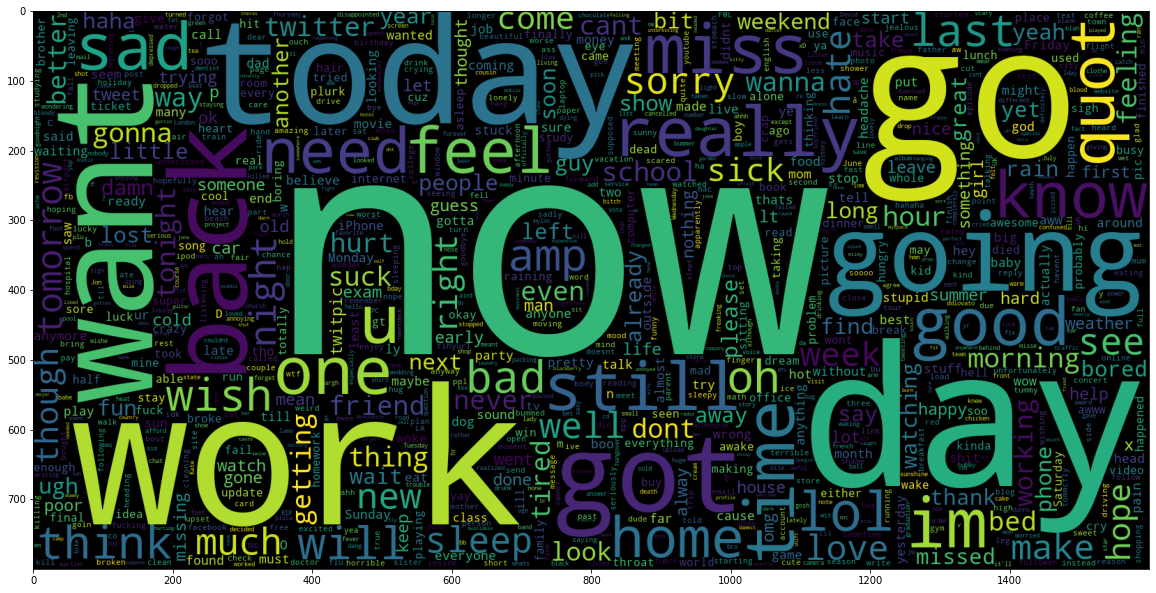

In [ ]:
data_negative = data['text'][:800000] # generated using the first 800,000 rows of the "text" column
plt.figure(figsize = (20,20))

# max_words parameter is set to 1000
# meaning only the 1000 most frequent words will be displayed in the cloud
# width and height (the dimensions of the word cloud)
#"collocations" = False , means that the word cloud will not show bigrams or trigrams
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_negative))

# "imshow" function from the matplotlib library is used to display the generated word cloud
plt.imshow(wc)

generates a word cloud from the positive texts



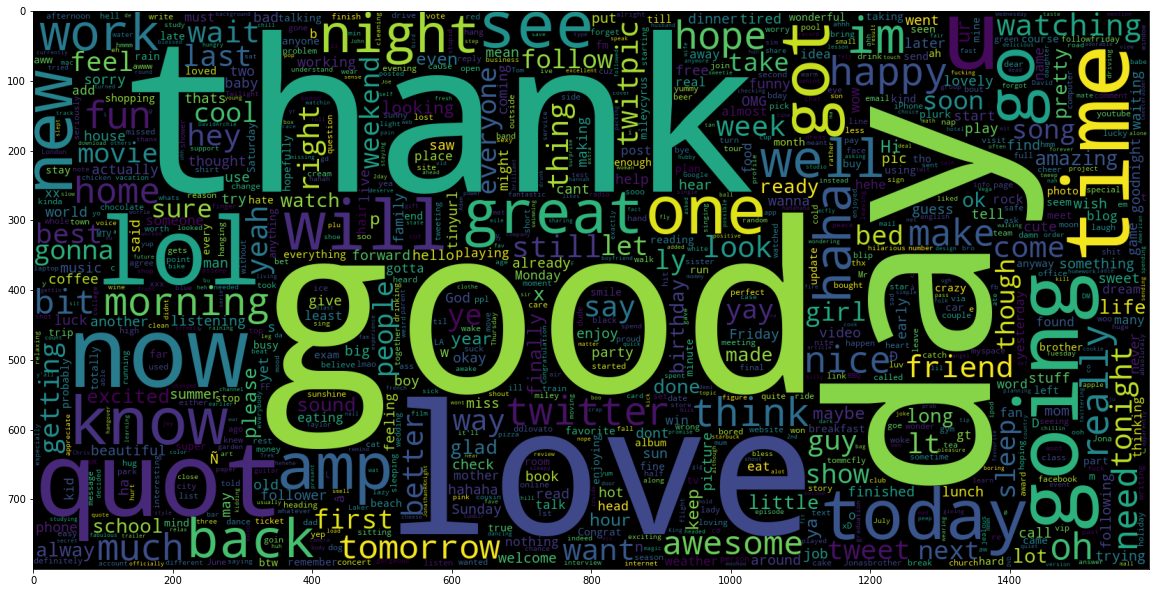

In [ ]:
# The dataset "data" has two columns, "text" and "target"

# The first half of the text column (the first 800000 rows) is stored in "data_negative"
# The second half of the text column (the remaining rows) is stored in "data_positive"

data_positive = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_positive))
plt.figure(figsize = (20,20))
plt.imshow(wc)

#Building and preparing the training model

Separating the 90% data for training data and 10% for testing data


*   x_train: It is used to represent features for the training data

*   x_test: It is used to represent features for testing data
* y_train: It is used to represent dependent variables for training data
* y_test: It is used to represent independent variable for testing data



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state =26105111)

Transforming Dataset using TF-IDF Vectorizer


In [ ]:
# The TfidfVectorizer is used to convert a collection of raw text documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features
# ngram_range argument specifies the size of the word combinations that should be considered as features
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

# means that both unigrams (individual words) and bigrams (pairs of consecutive words) should be considered as features
# max_features argument specifies the maximum number of features to keep

vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))  #  number of feature words is printed by calling len(vectoriser.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [ ]:
#data is transformed into a numerical representation that is suitable for training a machine learning model
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

#  This transformation is performed using a Tf-Idf (Term Frequency-Inverse Document Frequency) vectorizer

#The vectoriser.transform method is applied to both X_train and X_test

# converting each document into a sparse matrix representation where each row represents a document and each column represents a feature (word) from the vocabulary

#The feature values are the Tf-Idf values, which measure the importance of a word in a document in the context of the entire corpus

In [ ]:

# evaluate performance by comparing the predicted values to the actual values for the test dataset
# and stores the predictions in the y_pred variable

def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']

  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

  #plots the confusion matrix using the confusion_matrix and sns.heatmap functions

# fits Bernoulli Naive Bayes (BNB) model

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     80200
           1       0.79      0.81      0.80     79800

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



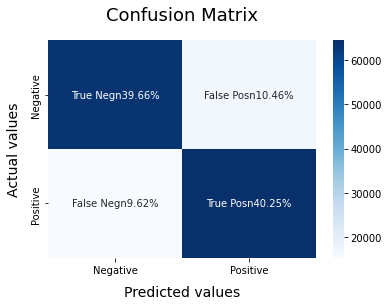

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
#The predictions made by the BNB model on the test data are stored in the y_pred1 variable

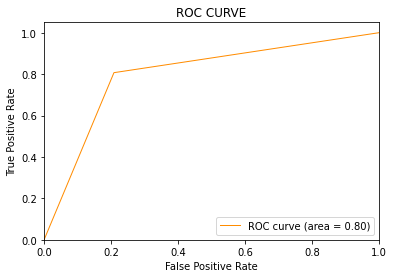

In [ ]:
from sklearn.metrics import roc_curve, auc

#  calculates the false positive rate and true positive rate using the "roc_curve" function from the scikit-learn library
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#  Fits Support Vector Machine (SVM) model

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     80200
           1       0.81      0.82      0.82     79800

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



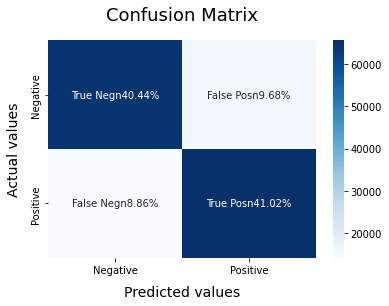

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

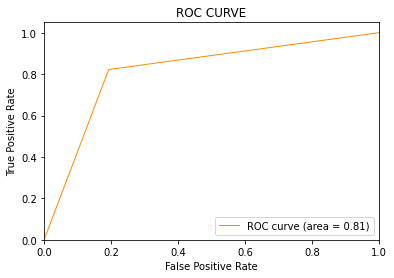

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#  the area under the curve (AUC) is a measure of the model accuracy

#  Fits logistic regression model (LRmodel) model

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     80200
           1       0.82      0.83      0.83     79800

    accuracy                           0.83    160000
   macro avg       0.83      0.83      0.83    160000
weighted avg       0.83      0.83      0.83    160000



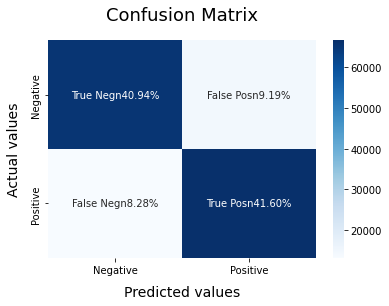

In [ ]:
# C: Inverse of regularization strength; must be a positive float
# Smaller values specify stronger regularization

# max_iter: Maximum number of iterations taken for the solvers to converge
# n_jobs: Number of CPU cores used when parallel computing. -1 means using all available cores

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

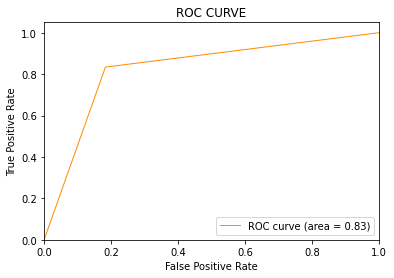

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()